# Feature Selection
* Selecting features from the dataset
* Improve estimator's accuracy
* Boost preformance for high dimensional datsets

In [1]:
from sklearn import feature_selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### VarianceThreshold
* Drop the columns whose variance is below configured level
* This method is unsupervised .i.e target not taken into action
* Intution : Columns whose values arn't petty much the same won't have much impact on target

In [2]:
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [3]:
df

A  B  C
0  m  1  1
1  f  2  2
2  m  3  3
3  m  1  1
4  m  2  2
5  m  1  1
6  m  1  1
7  m  1  1

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df['A'] = le.fit_transform(df.A)

In [7]:
df

A  B  C
0  1  1  1
1  0  2  2
2  1  3  3
3  1  1  1
4  1  2  2
5  1  1  1
6  1  1  1
7  1  1  1

In [9]:
vt = feature_selection.VarianceThreshold(threshold=.2)

In [10]:
vt.fit_transform(df)

array([[1, 1],
       [2, 2],
       [3, 3],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1]])

In [11]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

### Chi-Square for Non-negative feature & class
* Feature data should be booleans or count
* Supervised technique for feature selection
* Target should be discrete
* Higher chi value means more important feature for target

In [12]:
df = pd.read_csv('datasets/tennis.csv')
df.head()

outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes

In [13]:
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [21]:
df

outlook  temp  humidity  windy  play
0         2     1         0      0     0
1         2     1         0      1     0
2         0     1         0      0     1
3         1     2         0      0     1
4         1     0         1      0     1
5         1     0         1      1     0
6         0     0         1      1     1
7         2     2         0      0     0
8         2     0         1      0     1
9         1     2         1      0     1
10        2     2         1      1     1
11        0     2         0      1     1
12        0     1         1      0     1
13        1     2         0      1     0

In [20]:
df.drop('play',axis=1)

outlook  temp  humidity  windy
0         2     1         0      0
1         2     1         0      1
2         0     1         0      0
3         1     2         0      0
4         1     0         1      0
5         1     0         1      1
6         0     0         1      1
7         2     2         0      0
8         2     0         1      0
9         1     2         1      0
10        2     2         1      1
11        0     2         0      1
12        0     1         1      0
13        1     2         0      1

In [24]:
chi2, pval = feature_selection.chi2(df.drop('play',axis=1),df.play)

In [25]:
chi2

array([2.02814815, 0.02222222, 1.4       , 0.53333333])

In [26]:
pval

array([0.15440865, 0.88149745, 0.23672357, 0.46520882])

### 4. ANOVA using f_classif
* For feature variables continues in nature
* And, target variable discrete in nature
* Internally, this method uses ratio of variation within a columns & variation across columns

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer_data = load_breast_cancer()

In [32]:
X = cancer_data.data
Y = cancer_data.target
print(X.shape)

(569, 30)


In [33]:
F, pval = feature_selection.f_classif(X,Y)

In [34]:
print(pval)

[8.46594057e-096 4.05863605e-025 8.43625104e-101 4.73456431e-088
 1.05185036e-018 3.93826311e-056 9.96655576e-084 7.10115016e-116
 5.73338403e-016 7.59936804e-001 9.73894866e-050 8.43332029e-001
 1.65190518e-047 5.89552139e-046 1.10296609e-001 9.97599465e-013
 8.26017617e-010 3.07230877e-024 8.76641818e-001 6.30735508e-002
 8.48229192e-116 1.07805749e-030 5.77139714e-119 2.82884770e-097
 6.57514363e-026 7.06981635e-055 2.46466396e-072 1.96909971e-124
 2.95112058e-025 2.31643245e-015]


In [35]:
print(F)

[6.46981021e+02 1.18096059e+02 6.97235272e+02 5.73060747e+02
 8.36511234e+01 3.13233079e+02 5.33793126e+02 8.61676020e+02
 6.95274435e+01 9.34592949e-02 2.68840327e+02 3.90947023e-02
 2.53897392e+02 2.43651586e+02 2.55796780e+00 5.32473391e+01
 3.90144816e+01 1.13262760e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 8.97944219e+02 6.61600206e+02
 1.22472880e+02 3.04341063e+02 4.36691939e+02 9.64385393e+02
 1.18860232e+02 6.64439606e+01]


* Each value represents importance of a feature

### Univariate Regression Test using f_regression
* Linear model for testing the individual effect of each of many regressors.
* Correlation between each value & target is calculated
* F-test captures linear dependency

In [36]:
from sklearn.datasets import california_housing

In [37]:
house_data = california_housing.fetch_california_housing()

In [38]:
X,Y = house_data.data, house_data.target
print(X.shape,Y.shape)

(20640, 8) (20640,)


In [39]:
F, pval = feature_selection.f_regression(X,Y)

In [40]:
F

array([1.85565716e+04, 2.32841479e+02, 4.87757462e+02, 4.51085756e+01,
       1.25474103e+01, 1.16353421e+01, 4.38005453e+02, 4.36989761e+01])

* Columns with top F values are the selected features 

### F score verses Mutual Information

In [42]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

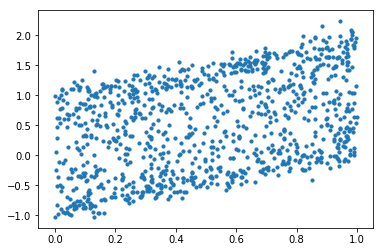

In [43]:
plt.scatter(X[:,0],y,s=10)

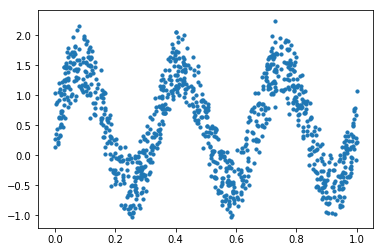

In [44]:
plt.scatter(X[:,1],y,s=10)

In [45]:
F, pval = feature_selection.f_regression(X,y)
print(F)

[187.42118421  52.52357392   0.47268298]


### Mutual Information for regression using mutual_info_regression
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is continues in nature

In [46]:
feature_selection.mutual_info_regression(X,y)

array([0.31431334, 0.86235026, 0.        ])

### Mutual Information for classification using mutual_info_classification
* Returns dependency in the scale of 0 & 1 among feature & target
* Captures any kind of dependency even if non-linear
* Target is discrete in nature

In [46]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [47]:
adult_data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  Salary  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [48]:
cat_cols = list(adult_data.select_dtypes('object').columns)

In [49]:
cat_cols.remove('Salary')

In [50]:
len(cat_cols)

8

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
for col in cat_cols:
    le = LabelEncoder()
    adult_data[col]  = le.fit_transform(adult_data[col])

In [54]:
X = adult_data.drop(columns=['Salary'])
y = le.fit_transform(adult_data.Salary)

In [57]:
firep = feature_selection.mutual_info_classif(X, y)

In [56]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [61]:
X.columns[np.argsort(firep)[::-1]]

Index(['relationship', 'marital-status', 'capital-gain', 'education-num',
       'occupation', 'education', 'age', 'hours-per-week', 'capital-loss',
       'fnlwgt', 'sex', 'workclass', 'native-country', 'race'],
      dtype='object')

### SelectKBest
* SelectKBest returns K important features based on above techniques
* Based on configuration, it can use mutual_information or ANOVA or regression based techniques

In [62]:
adult_data.head
adult_data.shape

(32561, 15)

In [63]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.f_classif)

In [64]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)
data.shape

(32561, 7)

In [65]:
selector.scores_

array([1.88670731e+03, 8.69361605e+01, 2.91559359e+00, 2.06129509e+02,
       4.12009578e+03, 1.34685178e+03, 1.86500322e+02, 2.18764583e+03,
       1.68934788e+02, 1.59310791e+03, 1.70915006e+03, 7.54830452e+02,
       1.81338628e+03, 8.17155711e+00])

In [66]:
selector = feature_selection.SelectKBest(k=7, score_func=feature_selection.mutual_info_classif)

In [67]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)
data.shape

(32561, 7)

In [68]:
selector.scores_

array([0.06690401, 0.01370925, 0.03250768, 0.0669169 , 0.06777548,
       0.10981125, 0.0656777 , 0.11179161, 0.009932  , 0.02940243,
       0.08507063, 0.03616073, 0.04119909, 0.00730487])

### SelectPercentile
* Selecting top features whose importances are in configured parameter
* Default is top 10 percentile

In [69]:
selector = feature_selection.SelectPercentile(percentile=20, score_func=feature_selection.mutual_info_classif)

In [70]:
data = selector.fit_transform(adult_data.drop('Salary',axis=1),adult_data.Salary)
data.shape

(32561, 3)

### SelectFromModel
* Selecting important features from model weights
* The estimator should support 'feature_importances'

In [71]:
from sklearn.datasets import load_boston

In [72]:
boston = load_boston()
boston.data.shape

(506, 13)

In [73]:
from sklearn.linear_model import LinearRegression

In [77]:
clf = LinearRegression()
sfm = feature_selection.SelectFromModel(clf, threshold=0.25)

In [79]:
clf = LinearRegression()

In [80]:
sfm.fit_transform(boston.data, boston.target).shape

(506, 7)

### Recursive Feature Elimination
* Uses an external estimator to calculate weights of features
* First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. 
* Then, the least important features are pruned from current set of features. 
* That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [134]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_regression(n_samples=50, n_features=10, random_state=0)

In [138]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
data = selector.fit_transform(X, y)

In [139]:
X.shape

(50, 10)

In [140]:
data.shape

(50, 5)

In [141]:
selector.ranking_

array([1, 1, 4, 3, 1, 6, 1, 2, 5, 1])